<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Become familiar with the dataset

The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's



In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


### Task 2: Generate Descriptive Statistics and Visualizations

For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable


Text(0.5, 1.0, 'Owner-occupied homes')

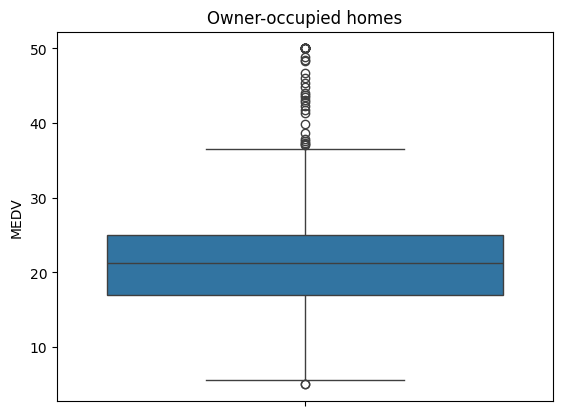

In [7]:
axis_occupied = sns.boxplot(y = 'MEDV', data = boston_df)
axis_occupied.set_title('Owner-occupied homes')

### Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, '# of homes near The Charles River')

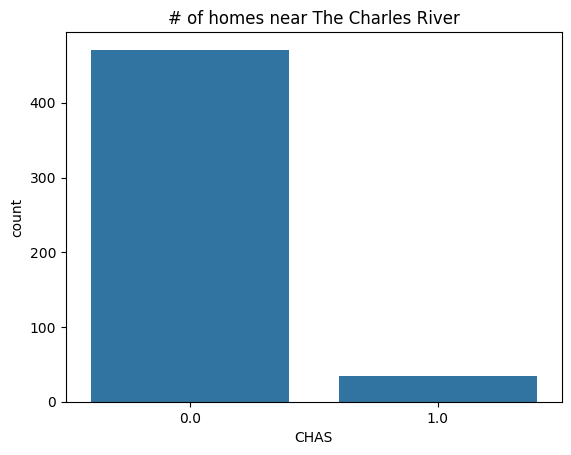

In [8]:
axis_charles = sns.countplot(x = 'CHAS', data = boston_df)
axis_charles.set_title('# of homes near The Charles River')

### Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Text(0.5, 1.0, 'Median value of owner-occupied homes per Age Group')

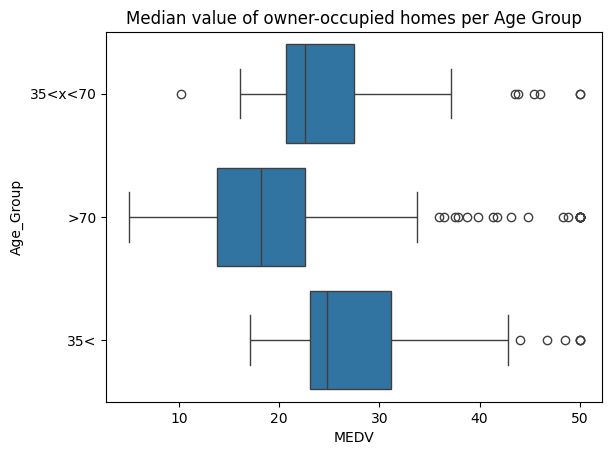

In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'Age_Group'] = '35<'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'Age_Group'] = '35<x<70'
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = '>70'
axis_homes = sns.boxplot(x = 'MEDV', y = 'Age_Group', data = boston_df)
axis_homes.set_title('Median value of owner-occupied homes per Age Group')

### Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Conf of NO per ratio of non-retail Business Acres Per Town')

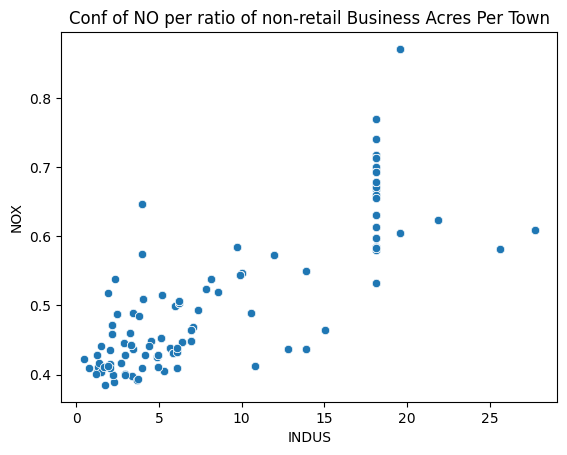

In [10]:
axis_nox = sns.scatterplot(y = 'NOX', x = 'INDUS', data = boston_df)
axis_nox.set_title('Conf of NO per ratio of non-retail Business Acres Per Town')

This graph suggests that increasing the percentage of non-retail business land within a town also leads to increased nitric oxide concentrations, a marker of air pollution and vice versa.

### Q5: Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Student and Teacher Ratio')

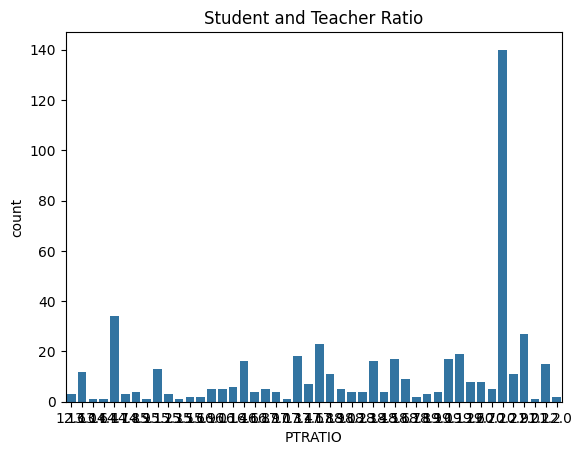

In [11]:
axis_Teach = sns.countplot(x = 'PTRATIO', data = boston_df)
axis_Teach.set_title('Student and Teacher Ratio')

## Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [15]:
import scipy.stats

chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value_q1 = scipy.stats.ttest_ind(chas_0, chas_1, equal_var=True)

print(f"T-Statistic: {t_statistic:.4f}")
print(f"p-Value: {p_value_q1:.4f}")

alpha = 0.05

if p_value_q1 < alpha:
    print("Conclusion: Reject the Null Hypothesis. There is a significant difference in MEDV between houses bounded and not bounded by the Charles River.")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis. There is no significant difference in MEDV between the two groups.")

T-Statistic: -3.9964
p-Value: 0.0001
Conclusion: Reject the Null Hypothesis. There is a significant difference in MEDV between houses bounded and not bounded by the Charles River.


#### Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [19]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# 1. Regresyon Modeli
lm = ols('MEDV ~ Age_Group', data=boston_df).fit()

# 2. ANOVA Tablosunu Hesaplama (Değişken adı doğru: anova_table)
anova_table = sm.stats.anova_lm(lm)

# 3. F-İstatistiği ve p-Değerini Çekme (Değişken adı düzeltildi: anova_table)
f_statistic = anova_table['F']['Age_Group']
p_value_q2 = anova_table['PR(>F)']['Age_Group']

print(f"F-Statistic (Age_Group): {f_statistic:.4f}")
print(f"p-Value (Age_Group): {p_value_q2:.4f}")

alpha = 0.05

if p_value_q2 < alpha:
    print("Conclusion: Reject the Null Hypothesis. The Median values of houses (MEDV) are significantly different across the AGE groups.")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis. There is no significant difference in MEDV across the AGE groups.")

F-Statistic (Age_Group): 36.4076
p-Value (Age_Group): 0.0000
Conclusion: Reject the Null Hypothesis. The Median values of houses (MEDV) are significantly different across the AGE groups.


#### Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [17]:
import scipy.stats

r_coefficient, p_value_q3 = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient (r): {r_coefficient:.4f}")
print(f"p-Value: {p_value_q3:.4f}")

alpha = 0.05

if p_value_q3 < alpha:
    print("Conclusion: Reject the Null Hypothesis (rho = 0). There is a significant, strong positive relationship between NOX and INDUS. We CANNOT conclude there is no relationship.")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis (rho = 0). We can conclude there is no significant relationship.")

Pearson Correlation Coefficient (r): 0.7637
p-Value: 0.0000
Conclusion: Reject the Null Hypothesis (rho = 0). There is a significant, strong positive relationship between NOX and INDUS. We CANNOT conclude there is no relationship.


#### Q4: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [20]:
import statsmodels.api as sm

X = boston_df['DIS']

X = sm.add_constant(X)

Y = boston_df['MEDV']

model = sm.OLS(Y, X).fit()

print(model.summary())

dis_coefficient = model.params['DIS']
dis_p_value = model.pvalues['DIS']

print(f"\nDIS Coefficient (Impact on MEDV): {dis_coefficient:.4f}")
print(f"DIS p-Value: {dis_p_value:.4f}")

alpha = 0.05

if dis_p_value < alpha:
    print(f"Conclusion: Reject the Null Hypothesis. DIS has a significant positive impact on MEDV. An additional unit increase in DIS is associated with an approximate ${dis_coefficient*1000:.0f} increase in MEDV.")
else:
    print("Conclusion: Fail to Reject the Null Hypothesis. DIS does not have a significant impact on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           1.21e-08
Time:                        15:07:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0